<a href="https://colab.research.google.com/github/alirezakhaleghianaghizi/ml_1401/blob/main/ch2q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

تمرین کامپیوتری یادگیری ماشین 

علیرضا خالقی آناقیزی

99101462

تمرین2

Problem C3

در زیر ما فایل مورد نظر را در درایو گوگل آپلود کرده ایم و برای این که دیتا ها را لود کنیم ابتدا باید درایو را به سیستم متصل کنیم و سپس از فولدری که 

path

مورد نظر میباشد آن را لود کنیم.

In [73]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


A. Load Data

In [ ]:
filepath='/content/drive/MyDrive/ml/data_banknote_authentication.csv' 
df = pd.read_csv(filepath)
print(df.to_string()) 

In [75]:
dataset=np.array(df).T


In [76]:
print(len(dataset))

5


In [77]:
X=dataset[0:len(dataset)-1].T
print(X)
Y=dataset[len(dataset)-1].T
print(Y)

[[-1.7104  -4.778    6.2109   0.3974 ]
 [ 3.7635   2.7811   0.66119  0.34179]
 [ 5.3915   9.9946  -3.8081  -3.3642 ]
 ...
 [-3.6053  -5.974   10.0916  -0.82846]
 [ 2.0421   1.2436   4.2171   0.90429]
 [ 1.9476  -4.7738   8.527   -1.8668 ]]
[ 1.  1. -1. ... -1.  1. -1.]


In [78]:
import math
X_train=np.array(X[0:math.floor(0.8*len(X))])
Y_train=np.array(Y[0:math.floor(0.8*len(X))])

X_test=np.array(X[math.floor(0.8*len(X)):len(X)])
Y_test=np.array(Y[math.floor(0.8*len(X)):len(X)])

B. Perceptron Algorithm


دلیل اضافه کردن این یک برای این است که در رابطه خطی رابطه را به صورت همگن در بیاوریم و مقدار ثابت 

b

 را به عنوان یکی از ضرایب خطی سازی در نظر بگیریم و بگوییم هر مشخصه یک مقدار 1 دارد که در ضریبش ضرب شده و مقدار ثابت را میسازد.

In [83]:
x0train=np.array(np.ones(len(X_train)))
x0test=np.array(np.ones(len(X_test)))
X_train1= np.append([x0train],X_train.T,axis=0)
X_test1=np.append([x0test],X_test.T,axis=0)
X_train1tra=np.array(X_train1).T
X_test1tra=np.array(X_test1).T

[[  1.         1.         1.       ...   1.         1.         1.      ]
 [ -2.6649     3.8027     3.8384   ...  -3.6053     2.0421     1.9476  ]
 [-12.813      0.81529    6.1851   ...  -5.974      1.2436    -4.7738  ]
 [ 12.6689     2.1041    -2.0439   ...  10.0916     4.2171     8.527   ]
 [ -1.9082     1.0245    -0.033204 ...  -0.82846    0.90429   -1.8668  ]]


حالا تابعی مینویسیم برای الگوریتم تکراری

در زیر ما سه تابع نوشتیم که اولی هر گام را انجام میدهد و ضرایب جدید را میسازد و دومی خطا را حساب میکند و سومی نیز تابع کلی است که 50000 بار تکرار میکند

In [93]:
def perceptronN(w,y,x):
  h=np.dot(w,x)
  xtr=np.array(x).T
  wt1=w
  for i in range(len(h)):
    if h[i]*y[i]<=0:
      wt1=np.add(wt1,y[i]*xtr[i])
  return (wt1)

def calLsn(w,y,x):
  M=(len(x[0]))
  h=np.dot(w,x)
  sum=0
  for i in range(M):
     if h[i]*y[i]<=0:
      sum=sum+1
  L=sum/M 
  #print("L"+str(len(x)))
  #print(L) 
  #print("max"+str(len(x)))
  #print(max)
  return (L)

def perceptron(X_tr, Y_tr, X_te, Y_te, max_iter=50000):
  xtra=np.array(X_tr).T
  w=abs(xtra[0]*0);
  loss_history=[]
  for i in range(max_iter):
    w=perceptronN(w,Y_tr,X_tr)
    if i%500==0:
      Loss=calLsn(w,Y_te, X_te)
      loss_history.append(Loss)
  return w,loss_history

w,loss_history=perceptron(X_train1,Y_train,X_test1,Y_test)
print(w)
print(loss_history)

[1763.          800.1181336  -435.25372948  153.08152479 5112.63114089]
[0.18545454545454546, 0.014545454545454545, 0.02909090909090909, 0.01090909090909091, 0.01090909090909091, 0.02909090909090909, 0.02909090909090909, 0.01818181818181818, 0.014545454545454545, 0.01090909090909091, 0.014545454545454545, 0.01090909090909091, 0.02909090909090909, 0.02909090909090909, 0.014545454545454545, 0.02909090909090909, 0.02909090909090909, 0.014545454545454545, 0.014545454545454545, 0.014545454545454545, 0.02909090909090909, 0.01818181818181818, 0.02909090909090909, 0.014545454545454545, 0.02909090909090909, 0.014545454545454545, 0.01090909090909091, 0.01090909090909091, 0.02909090909090909, 0.02909090909090909, 0.02909090909090909, 0.02909090909090909, 0.02909090909090909, 0.014545454545454545, 0.02909090909090909, 0.01818181818181818, 0.014545454545454545, 0.02909090909090909, 0.01818181818181818, 0.01818181818181818, 0.014545454545454545, 0.02909090909090909, 0.01818181818181818, 0.0290909090

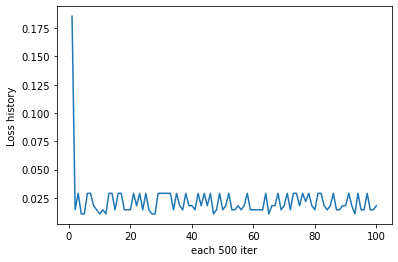

In [92]:
finalloss=loss_history[len(loss_history)-1]
import matplotlib.pyplot as plt
xaxis=[]
for i in range(len(loss_history)):
  xaxis.append((i+1))
xpoints = np.array(xaxis)
ypoints = np.array(loss_history)
plt.xlabel("each 500 iter")
plt.ylabel("Loss history")
plt.plot(xpoints, ypoints)
plt.show()

C. Generalize to non-linear classification

حالا کافی است یک ستون که توان سه ستون چهارم است را اضافه کنیم

LinAlgError: ignored